DIP ASSIGNMENT 1 PSALTAKIS GEORGIOS TH20027

Άσκηση 1:

Να διαβάσετε την εικόνα rise.png, να κανονικοποιήσετε τις τιμές της εικόνας και να υπολογίσετε την δυαδική εικόνα με τους κόκους ρυζιού. Στην συνέχεια βρείτε την 4 (δημιουργόντας δικής σας συνάρτηση) και 8 γειτνίαση (με την συνάρτηση απο την scikit image) και εμφανίστε τις σε ένα figure με 2 subplots.

Ξεκινάμε με το να κάνουμε import τις ανάλογες βιβλιοθήκες μάς που χρειάζονται στον κώδικα μας. 

In [14]:
import matplotlib.pyplot as plot
import matplotlib.image as image

import numpy as np

import scipy
import scipy.ndimage

from skimage import io
import skimage as image_tool
from skimage import measure
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray, rgb2hsv
from skimage.filters import threshold_otsu
from skimage import measure
from skimage.morphology import binary_dilation, binary_erosion
import skimage.morphology

from PIL import Image

Διαβάζουμε την εικόνα rice.png

In [15]:
image = image.imread('rice.png')

Κανονικοποιώ την φωτογραφία που εισήγαγα 

In [16]:
image = (image * 255).round().astype(np.uint8)

Φτιάχνω το Otsu Κατώτατο Όριο  

In [17]:
thresh = threshold_otsu(image)

Εφαρμόζω το Κατώτατο Οριο

In [18]:
Binary_image = image > thresh

Μετατροπή σε ακέραιο

In [19]:
Binary_image=Binary_image.astype(int)

Γεμίζω τα κενά της εικόνας 

In [20]:
Binary_image=scipy.ndimage.binary_fill_holes(Binary_image)

In [21]:
Binary_image=Binary_image.astype(int)

Εφαρμόζω Κώδικα για γειτνίαση 4 γειτόνων

In [22]:
cords_x = []
cords_y = []

print(len(Binary_image))

for i in range (len(Binary_image)-1):
    for j in range(len(Binary_image)-1):
        if(Binary_image[i,j] == 1  and (Binary_image[i-1,j] == 0 or Binary_image[i+1,j] == 0 or Binary_image[i,j+1] == 0 or Binary_image[i,j-1] == 0)):
         cords_x.append(i)
         cords_y.append(j)

cords_x = np.asarray(cords_x, dtype=np.int32)
cords_y = np.asarray(cords_y, dtype=np.int32)

cords = np.transpose(np.vstack((cords_x,cords_y)))

256


Ορίζω τα όρια της εικόνας

In [23]:
Adjacency_Image = np.zeros((255,255)) 
Adjacency_Image = np.asarray(Adjacency_Image, bool)
Adjacency_Image = Adjacency_Image.astype(int)

Εφαρμόζω Περίμετρο

In [24]:
Adjacency_Image[cords[:,0], cords[:,1]] = 1

Εφαρμόζω Κώδικα για γειτνίαση 8 γειτόνων

In [25]:
[Labeled_image_8, num_of_neighbors_8] = measure.label(Binary_image,connectivity=2,background=True,return_num=True)

Κάνω πλότ τα δύο γραφήματα για 4 κ 8 γειτνίαση

Text(0.5, 1.0, '8 Neighbors Adjacency')

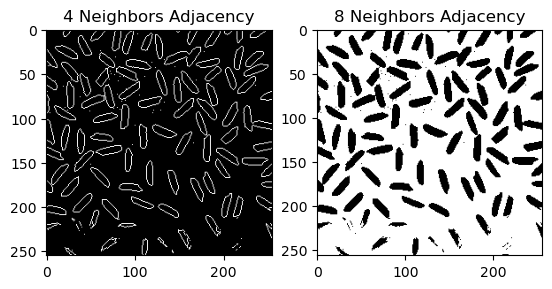

In [13]:
fig=plot.figure(10)

subplot = fig.add_subplot(1,2,1)
plot.imshow(Adjacency_Image, cmap="gray")
plot.title("4 Neighbors Adjacency")

subplot = fig.add_subplot(1,2,2)
plot.imshow(Labeled_image_8, cmap="gray")
plot.title("8 Neighbors Adjacency")

Άσκηση 2:

Να διαβάσετε την έγχρωμη εικόνα football.jpg να την μετατρέψετε σε ασπρόμαυρη και να κανονικοποιήσεται τις τιμές της εικόνας. Να δημιουργήσετε μια συνάρτηση προσθήκης
γκαουσιανού θόρυβου, να εφαρμόσετε τον θόρυβο στην εικόνα και να τις εμφανίσετε την αρχική και την εικόνα με θόρυβο σε ένα figure με 2 subplots. Στην συνέχεια να εφαρμόσετε στην εικόνα (με τον θόρυβο) τα εξής χωρικά φίλτρά:

1. 3x3 φίλτρο ομαλοποίησης
2. 5x5 φίλτρο ομαλοποίησης
3. Φίλτρο μέσης τιμής

Ακόμα εμφανίστε σε ένα figure με 4 subplots, την αρχική εικόνα με θόρυβο και τα 3 χωριακά φίλτρα. Τέλος συγκρίνεται/σχολιάσετε τα αποτελέσματα απο τα τρία χωρικά φίλτρα.

Ξεκινάμε με το να κάνουμε import τις ανάλογες βιβλιοθήκες μάς που χρειάζονται στον κώδικα μας. 

In [35]:
import matplotlib.pyplot as plot
import matplotlib.image as image

import numpy as np

import scipy
import scipy.ndimage

from skimage import io
import skimage as image_tool
from skimage import measure
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray, rgb2hsv
from skimage.filters import threshold_otsu
from skimage import measure
from skimage.morphology import binary_dilation, binary_erosion
import skimage.morphology

from PIL import Image

Διαβάζουμε την εικόνα football.jpg

In [36]:
image = image.imread('football.jpg'); 


Μετατρέπω το έγχρωμο σε ασπρόμαυρο της φωτό που εισήγαγα

In [37]:
Grayscale__image_scikit_image = rgb2gray(image) 

Κανονικοποιώ την φωτογραφία που εισήγαγα 

In [38]:
Grayscale_Norm = (Grayscale__image_scikit_image * 255).round().astype(np.uint8)


Φτιάχνω την συνάρτηση Εφαρμογής Γκαουσιαννού θορύβου

In [45]:
def gaussian_noise(Grayscale__image,std):
    mean = 0.0   
    noisy_img = Grayscale__image + np.random.normal(mean, std,Grayscale__image.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noisy_img_clipped = np.around(noisy_img_clipped) 
    noisy_img_clipped = np.asarray(noisy_img_clipped, dtype=np.uint8)
    
    return noisy_img_clipped

Εφαρμόζω τον γκαουσιαννό θόρυβο στην ασπρόμαυρη κανονικοποιημένη φωτό μας. 

In [46]:
gaussian_image = gaussian_noise(Grayscale_Norm, 30)

Πλοτάρω την ορίτζιναλ φώτο και την φώτο με γκαουσιανό θόρυβο. 

Text(0.5, 1.0, 'Photo with Gaussian Noise')

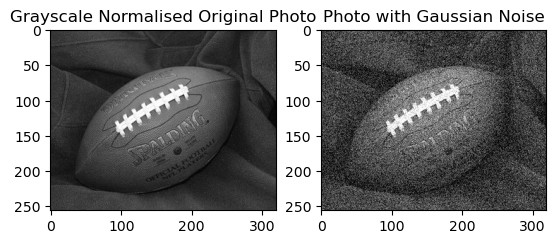

In [47]:
fig=plot.figure(11)

subplot = fig.add_subplot(1,2,1)
plot.imshow(Grayscale_Norm, cmap="gray")
plot.title("Grayscale Normalised Original Photo")

subplot = fig.add_subplot(1,2,2)
plot.imshow(gaussian_image, cmap="gray")
plot.title("Photo with Gaussian Noise")

Φτιάχνω δύο νέες εικόνες με τον γκαουσιανο θόρυβο φιλτραρισμένο κατα 3επι3 και 5επι5

In [48]:
filter_3_by_3 = np.ones((3,3))/9  
image_filtered_by_3 = scipy.ndimage.convolve(gaussian_image, filter_3_by_3)

filter_5_by_5 = np.ones((5,5))/25
image_filtered_by_5 = scipy.ndimage.convolve(gaussian_image, filter_5_by_5)


Φτιάχνω μια δευτερη εικόνα με τον ιδιο γκαουσιανο θόρυβο

In [50]:
gaussian_image2 = gaussian_noise(Grayscale_Norm, 30)

In [51]:
filter_3_by_3_2 = np.ones((3,3))/9
image_filtered_by_3_2 = scipy.ndimage.convolve(gaussian_image2, filter_3_by_3_2)

Φτιάχνω το φίλτρο μέσης τιμής

In [53]:
image_filtered_by_3_3 = np.zeros(gaussian_image2.shape)

for i in range (1, gaussian_image2.shape[0] - 1):
    for k in range (1, gaussian_image2.shape[1] - 1):
        image_filtered_by_3_3[i,k] = filter_3_by_3_2[0,0] * gaussian_image2[i-1,k-1] + \
                                        filter_3_by_3_2[0,1] * gaussian_image2[i-1,k] + \
                                        filter_3_by_3_2[0,2] * gaussian_image2[i-1,k+1] + \
                                        filter_3_by_3_2[1,0] * gaussian_image2[i,k-1] + \
                                        filter_3_by_3_2[1,1] * gaussian_image2[i,k] +\
                                        filter_3_by_3_2[1,1] * gaussian_image2[i,k] + \
                                        filter_3_by_3_2[1,2] * gaussian_image2[i,k+1] + \
                                        filter_3_by_3_2[2,0] * gaussian_image2[i+1,k-1] + \
                                        filter_3_by_3_2[2,1] * gaussian_image2[i+1,k] + \
                                        filter_3_by_3_2[2,2] * gaussian_image2[i+1,k+1] 

image_filtered_by_3_3 = (
      image_filtered_by_3_3 - np.min(image_filtered_by_3_3)) * 255 /\
      (np.max(image_filtered_by_3_3) - np.min(image_filtered_by_3_3))

image_filtered_by_3_3 = np.around(image_filtered_by_3_3)
image_filtered_by_3_3 = np.asarray(image_filtered_by_3_3, dtype=np.uint8) 

Πλοτάρω τα 4 γκαουσιανός θόρυβος 3χ3 5χ5 μέσης τιμής

Text(0.5, 1.0, 'Mean Filter')

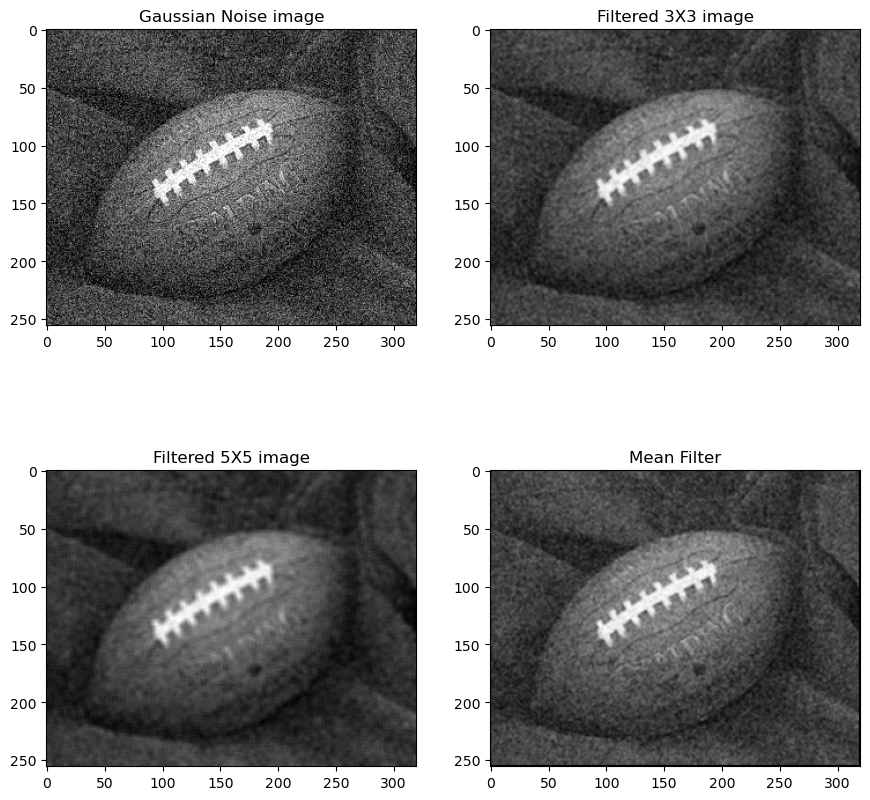

In [54]:
fig = plot.figure(18, figsize=(10.5, 10.5))

subplot = fig.add_subplot(2,2,1)
plot.imshow(gaussian_image,cmap="gray")
plot.title('Gaussian Noise image')

subplot = fig.add_subplot(2,2,2)
plot.imshow(image_filtered_by_3, cmap='gray')
plot.title('Filtered 3X3 image')

subplot = fig.add_subplot(2,2,3)
plot.imshow(image_filtered_by_5, cmap='gray')
plot.title('Filtered 5X5 image')

subplot = fig.add_subplot(2,2,4)
plot.imshow(image_filtered_by_3_3, cmap='gray')
plot.title('Mean Filter')